# **Plant Disease Detection Using CNN-TensorFlow**

**Dataset Link:**
https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

---

## Importing necessary libraries

In [70]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Input,
    Dense,
    Flatten,
    Conv2D,
    MaxPooling2D,
    Dropout,
    BatchNormalization,
)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Load Data

In [8]:
train_dir = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/"
val_dir = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/"

## Data Preprocessing

In [9]:
# Get the class names for our multi-class dataset
class_names = sorted(os.listdir(train_dir))
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [10]:
def count_image_df(path):
    df = pd.DataFrame(columns=["Classes", "Images_Count"])
    for dirpath, dirnames, filenames in os.walk(path):
        class_name = os.path.basename(dirpath)
        if class_name:
            df.loc[len(df.index)] = [class_name, len(filenames)]
    return df

In [15]:
train_count_image = count_image_df(train_dir)
train_count_image

,Classes,Images_Count
0,Tomato___Late_blight,1851
1,Tomato___healthy,1926
2,Grape___healthy,1692
3,Orange___Haunglongbing_(Citrus_greening),2010
4,Soybean___healthy,2022
5,Squash___Powdery_mildew,1736
6,Potato___healthy,1824
7,Corn_(maize)___Northern_Leaf_Blight,1908
8,Tomato___Early_blight,1920
9,Tomato___Septoria_leaf_spot,1745


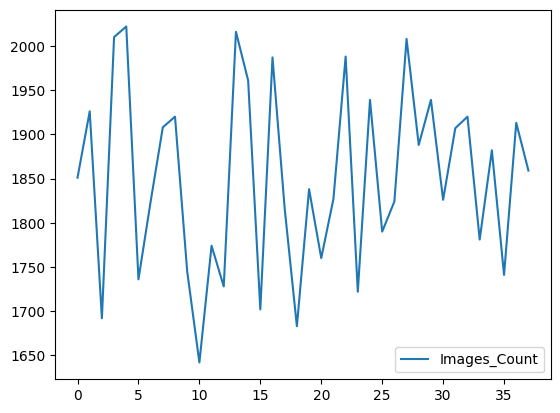

In [22]:
train_count_image.plot();

In [13]:
val_count_image = count_image_df(val_dir)
val_count_image

,Classes,Images_Count
0,Tomato___Late_blight,463
1,Tomato___healthy,481
2,Grape___healthy,423
3,Orange___Haunglongbing_(Citrus_greening),503
4,Soybean___healthy,505
5,Squash___Powdery_mildew,434
6,Potato___healthy,456
7,Corn_(maize)___Northern_Leaf_Blight,477
8,Tomato___Early_blight,480
9,Tomato___Septoria_leaf_spot,436


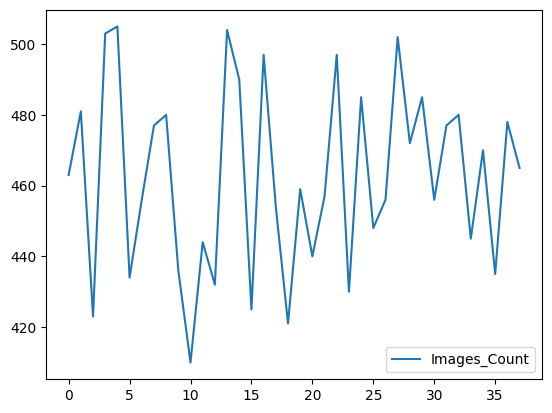

In [21]:
val_count_image.plot();

## Image Data Generator

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

batch_size = 128
# Load data in from directories and turn it into batches
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=batch_size,
    shuffle=True
    )

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(256, 256),
    batch_size=batch_size,
    shuffle=False
    )

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


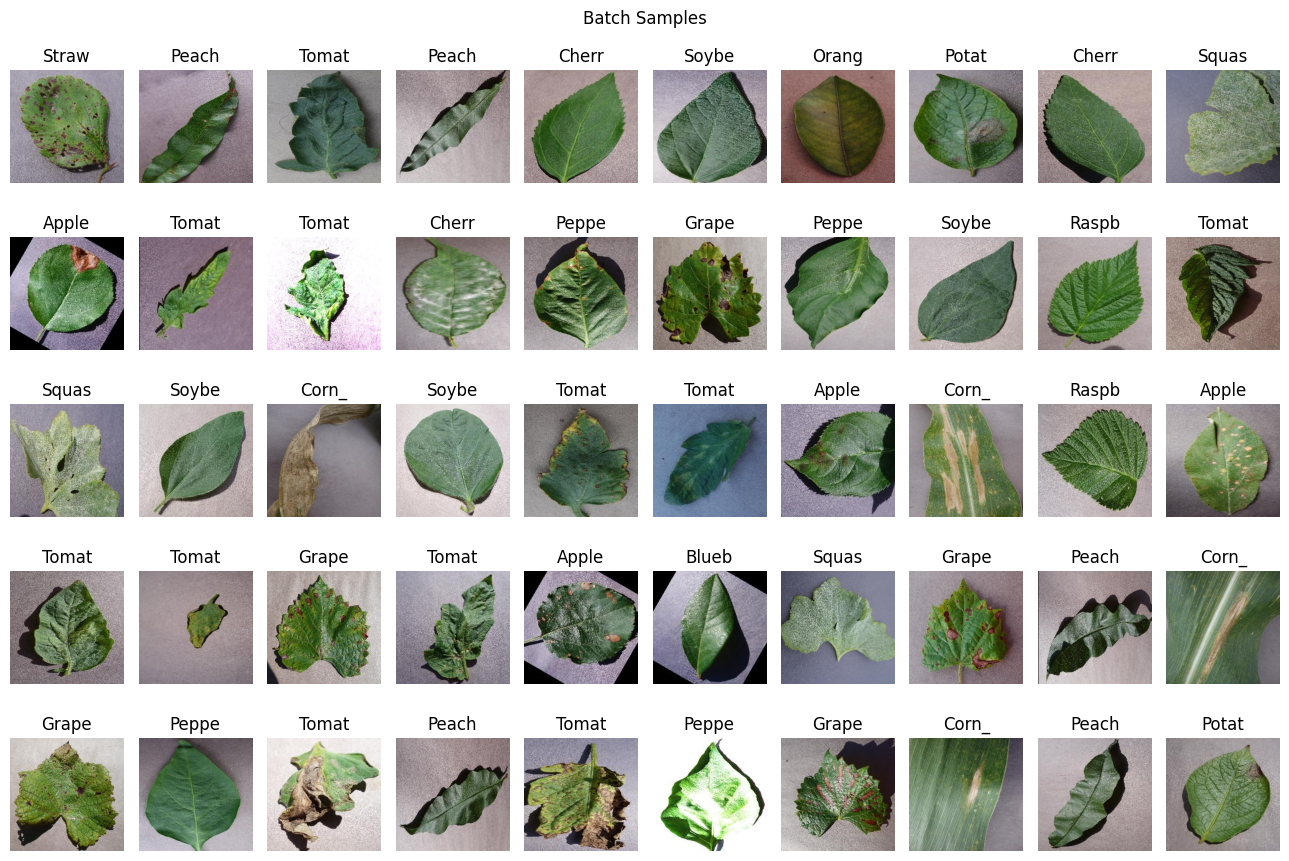

In [82]:
def visualize_batch_samples(generator, class_names, rows=5, cols=10, cmap=None, max_label_chars=5):
    """rows * cols must be less than or equal to the number of Batch samples (batch_size)."""
    x_batch, y_batch = next(generator)
    plt.figure(figsize=(cols * 1.3, rows * 1.8))
    plt.suptitle("Batch Samples")

    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(x_batch[i].squeeze(), cmap=cmap)
        label = class_names[np.argmax(y_batch[i])][:max_label_chars]
        plt.title(label)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

visualize_batch_samples(train_generator, class_names)

## Build CNN Model

In [55]:
def build_model():
    model = Sequential(
        [
            Input(shape=(256, 256, 3)),
            
            # First Conv Block
            Conv2D(32, (3, 3), activation="relu", padding="same"),
            BatchNormalization(),
            Conv2D(32, (3, 3), activation="relu", padding="same"),
            BatchNormalization(),
            MaxPooling2D((2, 2)),
            Dropout(0.25),
            
            # Second Conv Block
            Conv2D(64, (3, 3), activation="relu", padding="same"),
            BatchNormalization(),
            Conv2D(64, (3, 3), activation="relu", padding="same"),
            BatchNormalization(),
            MaxPooling2D((2, 2)),
            Dropout(0.25),
            
            # Classifier
            Flatten(),
            Dense(256, activation="relu"),
            BatchNormalization(),
            Dropout(0.5),
            Dense(38, activation="softmax"),
        ]
    )

    return model


model = build_model()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 256, 256, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 256, 256, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 256, 256, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 262144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      67,109,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,186,246 (256.30 MB)

 Trainable params: 67,185,350 (256.29 MB)

 Non-trainable params: 896 (3.50 KB)

## Compile Model

In [66]:
initial_learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)

model.compile(
    optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
)

## Add Callbacks

In [67]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [68]:
callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=3, min_lr=1e-6),
]

## Train Model

In [71]:
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    epochs=epochs,
    callbacks=callbacks,
)

Epoch 1/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 793s 1s/step - accuracy: 0.6868 - loss: 1.0732 - val_accuracy: 0.6078 - val_loss: 2.0606 - learning_rate: 0.0010
Epoch 2/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 0s 39us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 308s 555ms/step - accuracy: 0.8812 - loss: 0.3861 - val_accuracy: 0.8212 - val_loss: 0.6004 - learning_rate: 0.0010
Epoch 4/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 0s 39us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 271s 487ms/step - accuracy: 0.9431 - loss: 0.1823 - val_accuracy: 0.7935 - val_loss: 0.7303 - learning_rate: 0.0010
Epoch 6/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 0s 29us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 271s 487ms/step - accuracy: 0.9452 - loss: 0.1731 - val_accuracy: 0.8393 - val_loss: 0.5276 - learning_rate: 0.0010
Epoch 8/10
550/550 ━━━

## Evaluate Model

In [72]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"Final Val Accuracy: {val_acc:.4f}")
print(f"Final Val Loss: {val_loss:.4f}")

138/138 ━━━━━━━━━━━━━━━━━━━━ 53s 383ms/step - accuracy: 0.9524 - loss: 0.1570
Final Val Accuracy: 0.9433
Final Val Loss: 0.1783


## Plot Training History

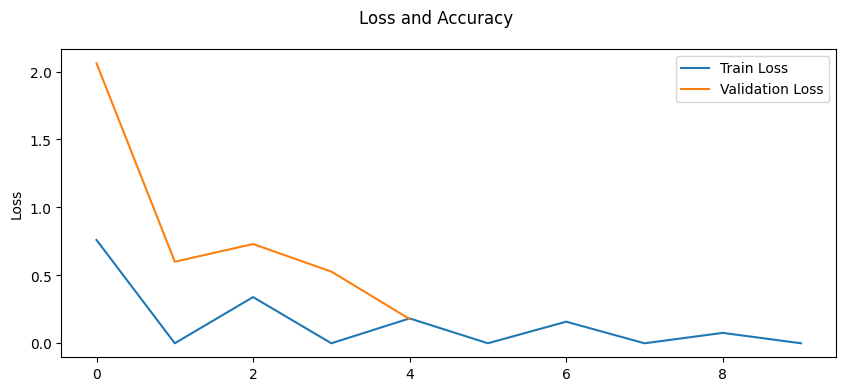

In [84]:
def plot_training_history(history):
    plt.figure(figsize=(10, 4))
    plt.suptitle("Loss and Accuracy")

    # Loss plot
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.ylabel("Loss")
    plt.legend()

plot_training_history(history)

## Save Model

In [81]:
# Save Full Model
model.save("cnn_model.keras")
print("Full model saved.")

Full model saved.
